,Time (s),Extensometer (mm),Load (kN),Engineering strain (abs.),Engineering stress (MPa)
0,0.000,0.000000,0.360657,0.000000e+00,15.027363
1,0.020,-0.000008,0.360663,-5.239448e-07,15.027642
2,0.040,-0.000016,0.360670,-1.047889e-06,15.027921
3,0.060,-0.000024,0.360677,-1.571835e-06,15.028196
4,0.080,-0.000031,0.360683,-2.095779e-06,15.028475
...,...,...,...,...,...
791,15.820,0.092902,7.492126,6.193439e-03,312.171917
792,15.840,0.093063,7.487854,6.204221e-03,311.993917
793,15.860,0.093225,7.483582,6.215002e-03,311.815917
794,15.880,0.093387,7.479309,6.225783e-03,311.637875


,Time (s),Extensometer (mm),Load (kN),Engineering strain (abs.),Engineering stress (MPa)
0,0.00000,0.000000,0.365571,0.000000e+00,15.232108
1,0.02000,0.000003,0.365559,1.669583e-07,15.231646
2,0.04000,0.000005,0.365548,3.339165e-07,15.231187
3,0.06000,0.000008,0.365538,5.008749e-07,15.230729
4,0.08000,0.000010,0.365526,6.678333e-07,15.230267
...,...,...,...,...,...
1323,26.46000,0.198505,7.902787,1.323367e-02,329.282792
1324,26.48000,0.198587,7.901032,1.323916e-02,329.209667
1325,26.50000,0.198670,7.899278,1.324466e-02,329.136583
1326,26.52000,0.198752,7.897523,1.325016e-02,329.063458


,Time (s),Extensometer (mm),Load (kN),Engineering strain (abs.),Engineering stress (MPa)
0,0.0000,0.000000,0.346373,0.000000e+00,14.432192
1,0.0200,-0.000002,0.346337,-1.431671e-07,14.430721
2,0.0400,-0.000004,0.346302,-2.863341e-07,14.429254
3,0.0600,-0.000006,0.346267,-4.295012e-07,14.427783
4,0.0800,-0.000009,0.346232,-5.726683e-07,14.426313
...,...,...,...,...,...
7593,151.8600,0.463954,7.876090,3.093025e-02,328.170417
7594,151.8800,0.463951,7.876082,3.093004e-02,328.170083
7595,151.9000,0.463947,7.876075,3.092983e-02,328.169792
7596,151.9200,0.463944,7.876067,3.092961e-02,328.169458


,Time (s),Extensometer (mm),Load (kN),Engineering strain (abs.),Engineering stress (MPa)
0,0.0000,0.000000e+00,0.364120,0.000000e+00,15.171654
1,0.0200,-4.717588e-07,0.364118,-3.145059e-08,15.171579
2,0.0400,-9.435175e-07,0.364116,-6.290117e-08,15.171508
3,0.0600,-1.415276e-06,0.364114,-9.435173e-08,15.171433
4,0.0800,-1.887035e-06,0.364113,-1.258023e-07,15.171363
...,...,...,...,...,...
1954,39.0800,2.212456e-01,7.747406,1.474971e-02,322.808583
1955,39.1000,2.212485e-01,7.747242,1.474990e-02,322.801750
1956,39.1200,2.212513e-01,7.747077,1.475009e-02,322.794875
1957,39.1400,2.212542e-01,7.746913,1.475028e-02,322.788042


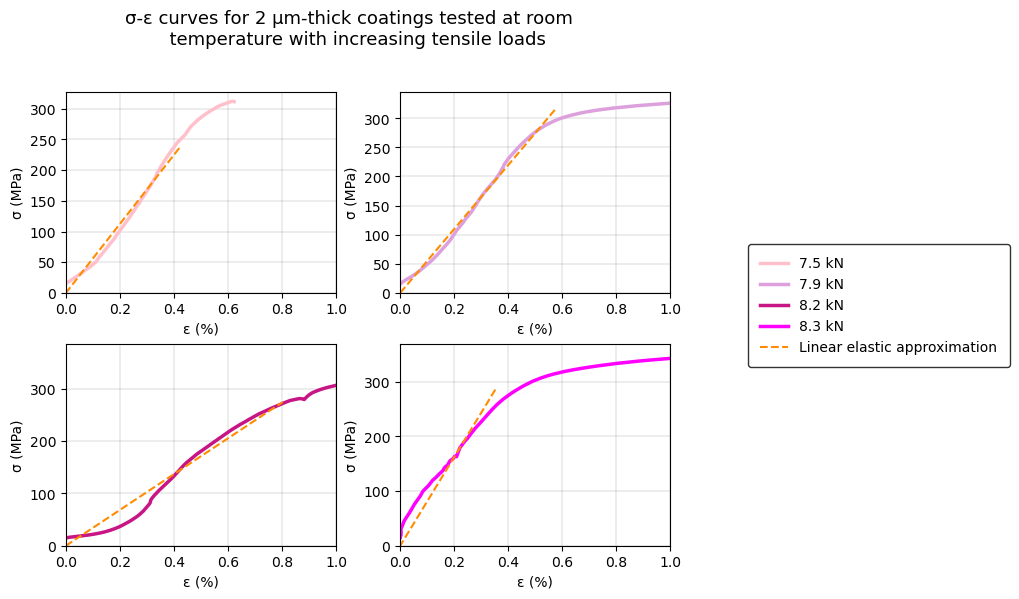

,Load (kN),R² value,Linear regression reliability,Approximate incremental modulus (GPa)
0,7.5,0.982522,VERY GOOD,56
1,7.9,0.991223,VERY GOOD,54
2,8.2,0.963955,VERY GOOD,34
3,8.3,0.911062,ADMISSIBLE,81


In [36]:
#---------------------------------------------|| PHYTON CLASSES AND LIBRARIES ||---------------------------------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorama, statistics
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from colorama import Fore, Style, Back
from statistics import mean 
from scipy import stats

#-------------------------------------------------|| DECLARED FUNCTIONS ||--------------------------------------------------#


def engineering_stress(load):
    A0 = 24  
    return load*1000/A0

def engineering_strain(extension): 
    L0 = 15 
    return extension/L0

def median_value(array):
    sum_val = 0
    for i in range (0, array.shape[0]):
        sum_val += array[i]
    return sum_val/array.shape[0]  

def r2regression(valori_reali, valori_attesi):
    RSS = float(0)
    TSS = float(0)
    media = median_value(valori_reali) 
    for i in range (0, valori_reali.shape[0]):
        RSS += (valori_reali[i] - valori_attesi[i])**2
        TSS += (valori_reali[i] - media)**2
    return round(float(1-RSS/TSS), 4)

def regression_reliability(r2):
    if(r2>=0.95):
        return 'VERY GOOD'
    elif(r2<0.95 and r2>=0.90):
        return 'ADMISSIBLE'
    else:
        return 'NOT GOOD'

#-------------------------------------------------|| EXCEL FILES IMPORT ||--------------------------------------------------#

''' 
The Pandas software library is employed to import all excel data and create the corresponding Dictionary (hereby called 'data').
Thus, a DataFrame is generated for each excel sheet loaded before. Each column is renamed for the sake of comprensibility; the 
engineering strain and stress are computed according to the functions defined in the "declared functions" section of the script.
'''
# create the general dictionary
data = pd.read_excel(r'C:\Users\Federico\Desktop\PhD\EXAMS\PHYTON DRIVING LICENSE\PROJECT_EXAM\RTdegC(2,0).xlsx', sheet_name=[1,2,3,4], usecols=[0,1,2,3])

# create the 1st DataFrame from the general dictionary
df1 = pd.DataFrame.from_dict(data[1], orient='columns')
df1 = df1.rename(columns={'time\n[s]':'Time (s)', 'crosshead\n[mm]':'Crosshead (mm)', 'extensometer\n[mm]':'Extensometer (mm)','load\n[kN]':'Load (kN)'})
df1['Engineering strain (abs.)'] =  engineering_strain( df1['Extensometer (mm)'] )
df1['Engineering stress (MPa)'] =  engineering_stress( df1['Load (kN)'] )
del df1["Crosshead (mm)"]
display(df1)

# create the 2nd DataFrame from the general dictionary
df2 = pd.DataFrame.from_dict(data[2], orient='columns')
df2 = df2.rename(columns={'time\n[s]':'Time (s)', 'crosshead\n[mm]':'Crosshead (mm)', 'extensometer\n[mm]':'Extensometer (mm)','load\n[kN]':'Load (kN)'})
df2['Engineering strain (abs.)'] =  engineering_strain( df2['Extensometer (mm)'] )
df2['Engineering stress (MPa)'] =  engineering_stress( df2['Load (kN)'] )
del df2["Crosshead (mm)"]
display(df2)

# create the 3rd DataFrame from the general dictionary
df3 = pd.DataFrame.from_dict(data[3], orient='columns')
df3 = df3.rename(columns={'time\n[s]':'Time (s)', 'crosshead\n[mm]':'Crosshead (mm)', 'extensometer\n[mm]':'Extensometer (mm)','load\n[kN]':'Load (kN)'})
df3['Engineering strain (abs.)'] =  engineering_strain( df3['Extensometer (mm)'] )
df3['Engineering stress (MPa)'] =  engineering_stress( df3['Load (kN)'] )
del df3["Crosshead (mm)"]
display(df3)


# create the 4th DataFrame from the general dictionary
df4 = pd.DataFrame.from_dict(data[4], orient='columns')
df4 = df4.rename(columns={'time\n[s]':'Time (s)', 'crosshead\n[mm]':'Crosshead (mm)', 'extensometer\n[mm]':'Extensometer (mm)','load\n[kN]':'Load (kN)'})
df4['Engineering strain (abs.)'] =  engineering_strain( df4['Extensometer (mm)'] )
df4['Engineering stress (MPa)'] =  engineering_stress( df4['Load (kN)'] )
del df4["Crosshead (mm)"]
display(df4)

#-----------------------------------------------|| LINEAR INTERPOLATION ||------------------------------------------------#

# interpolate the 1st set of data
X1 = df1['Engineering strain (abs.)']
Y1 = df1['Engineering stress (MPa)']
interpolation_function1 = interp1d(X1, Y1, kind = 'linear')
interpolation_points1 = np.linspace(0, df1.iloc[-1]['Engineering strain (abs.)'], Y1.shape[0])
interpolated_value1 = interpolation_function1(interpolation_points1)

# interpolate the 2nd set of data
X2 = df2['Engineering strain (abs.)']
Y2 = df2['Engineering stress (MPa)']
interpolation_function2 = interp1d(X2, Y2, kind = 'linear')
interpolation_points2 = np.linspace(0, df2.iloc[-1]['Engineering strain (abs.)'], Y2.shape[0])
interpolated_value2 = interpolation_function2(interpolation_points2)

# interpolate the 3rd set of data
X3 = df3['Engineering strain (abs.)']
Y3 = df3['Engineering stress (MPa)']
interpolation_function3 = interp1d(X3, Y3, kind = 'linear')
interpolation_points3 = np.linspace(0, df3.iloc[-1]['Engineering strain (abs.)'], Y3.shape[0])
interpolated_value3 = interpolation_function3(interpolation_points3)

# interpolate the 4th set of data
X4 = df4['Engineering strain (abs.)']
Y4 = df4['Engineering stress (MPa)']
interpolation_function4 = interp1d(X4, Y4, kind = 'linear')
interpolation_points4 = np.linspace(0, df4.iloc[-1]['Engineering strain (abs.)'], Y4.shape[0])
interpolated_value4 = interpolation_function4(interpolation_points4)

#-----------------------------------------------|| LINEAR REGRESSION ||------------------------------------------------#

# 1st linear regression
X1_1 = X1[:620].values.reshape(-1,1)
Y1_1 = Y1[:620].values.reshape(-1,1)
regressor1 = LinearRegression(fit_intercept = False).fit(X1_1, Y1_1)
y_estimated1 = regressor1.predict(X1_1)
incremental_modulus1 = int(regressor1.coef_/1000)

# 2nd linear regression
X2_2 = X2[:800].values.reshape(-1,1)
Y2_2 = Y2[:800].values.reshape(-1,1)
regressor2 = LinearRegression(fit_intercept = False).fit(X2_2, Y2_2)
y_estimated2 = regressor2.predict(X2_2)
incremental_modulus2 = int(regressor2.coef_/1000)

# 3rd linear regression
X3_3 = X3[:850].values.reshape(-1,1)
Y3_3 = Y3[:850].values.reshape(-1,1)
regressor3 = LinearRegression(fit_intercept = False).fit(X3_3, Y3_3)
y_estimated3 = regressor3.predict(X3_3)
incremental_modulus3 = int(regressor3.coef_/1000)

# 4th linear regression
X4_4 = X4[:1100].values.reshape(-1,1)
Y4_4 = Y4[:1100].values.reshape(-1,1)
regressor4 = LinearRegression(fit_intercept = False).fit(X4_4, Y4_4)
y_estimated4 = regressor4.predict(X4_4)
incremental_modulus4 = int(regressor4.coef_/1000)

#-----------------------------------------------|| PLOTS AND GRAPHICS ||------------------------------------------------#

''' 
STRESS VS. STRAIN CURVES
Axes is a 2x2 matrix containing the 4 diagrams to be displayed. The interpolation points, spanning all the engineering strain 
values, are represented on the x-axis. Notice that each strain value is multiplied by 100, to express the percent engineering 
strain [%]. The interpolated values [MPa] are plotted on the y-axis.
'''
fig, axes = plt.subplots(2,2, figsize=(7,6))
axes[0,0].plot(interpolation_points1*100, interpolated_value1, linewidth = 2.5, color = 'pink', label="7.5 kN")
axes[0,1].plot(interpolation_points2*100, interpolated_value2, linewidth = 2.5, color = 'plum', label="7.9 kN")
axes[1,0].plot(interpolation_points3*100, interpolated_value3, linewidth = 2.5, color = 'mediumvioletred', label="8.2 kN")
axes[1,1].plot(interpolation_points4*100, interpolated_value4, linewidth = 2.5, color = 'fuchsia', label="8.3 kN")

''' 
LINEAR REGRESSION
The linear elastic approximation is represented with a dashed line. The x-values are all the percent engineering strains, 
while the y-values are estimated based on the previous linear regression.
'''
axes[0,0].plot(X1_1*100, y_estimated1, linestyle='dashed', linewidth=1.5, color = 'darkorange')
axes[0,1].plot(X2_2*100, y_estimated2, linestyle='dashed', linewidth=1.5, color = 'darkorange')
axes[1,0].plot(X3_3*100, y_estimated3, linestyle='dashed', linewidth=1.5, color = 'darkorange')
axes[1,1].plot(X4_4*100, y_estimated4, linestyle='dashed', linewidth=1.5, color = 'darkorange', label='Linear elastic approximation')


''' 
GRAPHICS 
'''
# title of the image
plt.suptitle('\u03C3-\u03B5 curves for 2 \u03BCm-thick coatings tested at room \n  temperature with increasing tensile loads', horizontalalignment='center', verticalalignment='top', fontsize = 13)

# genreal layout amelioration
fig.tight_layout(pad = 2)

# same axis and grid for all diagrams
for axes in axes.flat:
    axes.set(xlabel='\u03B5 (%)', ylabel='\u03C3 (MPa)')
    axes.grid(color='k', linestyle='-', linewidth=0.1)
    axes.set_xlim(0,1)
    axes.set_ylim(0,)

# common legend for all diagrams
lines = []
labels = []
for axes in fig.axes:
    axLine, axLabel = axes.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
fig.legend(lines, labels, bbox_to_anchor=(1.45, 0.6), borderpad = 0.9, edgecolor='k', fontsize=10)

# visualization of all diagrams
plt.show()

''' 
NUMERICAL RESULTS 
A new DataFrame containing the numerical results is created.
'''
# generation of 4 different lists of results
pulling_force = ['7.5', '7.9', '8.2', '8.3']
r2_results = [r2_score(Y1_1, y_estimated1), r2_score(Y2_2, y_estimated2), r2_score(Y3_3, y_estimated3), r2_score(Y4_4, y_estimated4)]
r2_reliability = [regression_reliability(r2_score(Y1_1, y_estimated1)), regression_reliability(r2_score(Y2_2, y_estimated2)), regression_reliability(r2_score(Y3_3, y_estimated3)), regression_reliability(r2_score(Y4_4, y_estimated4))]
incremental_moduli = [incremental_modulus1, incremental_modulus2, incremental_modulus3, incremental_modulus4]

# creation of the corresponding DataFrame (N.B: each list is added to the DataFrame by way of the "zip" function)
df_results = pd.DataFrame(list(zip(pulling_force, r2_results, r2_reliability, incremental_moduli)), columns =['Load (kN)', 'R\u00b2 value', 'Linear regression reliability', 'Approximate incremental modulus (GPa)'])

# visualization of the final results
display(df_results.style.set_properties(**{'text-align': 'center'}))

